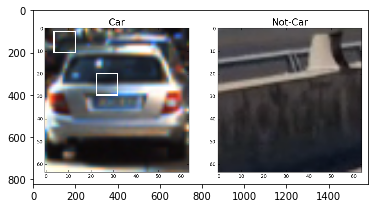

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

image = mpimg.imread('./examples/car_not_car.png')

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    draw_img = np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    return draw_img

bboxes = [((100, 100), (200, 200)), ((300, 300), (400, 400))]

result = draw_boxes(image, bboxes)
plt.imshow(result)

(array([53459, 55672, 37780, 29756, 24577, 35542, 51289, 53291, 32322,
        21928, 24886, 36616, 36357, 25165, 18248, 16380, 13840, 11849,
        13877, 13366, 16827, 17457, 13949, 15528, 20293, 22633, 21447,
        20671, 27818, 33818, 32370,  6589]),
 array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
          72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
         144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
         216.,  224.,  232.,  240.,  248.,  256.]))

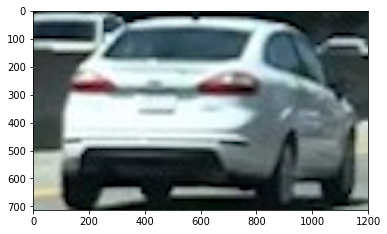

In [2]:
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('./examples/cutout1.jpg')

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
plt.imshow(image)
rhist

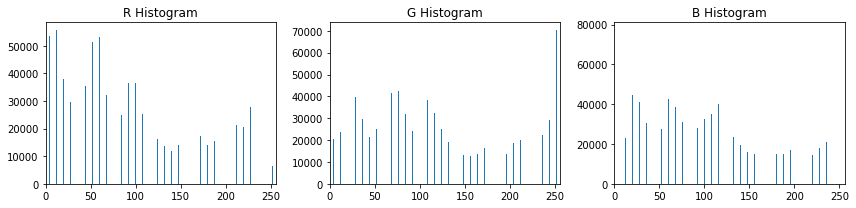

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('./examples/cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = channel_hist(img[:,:,0])
    ghist = channel_hist(img[:,:,1])
    bhist = channel_hist(img[:,:,2])
    # Generating bin centers
    bin_centers = calc_bin_centers(rhist[1])
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
def channel_hist(color_channel):
    return np.histogram(color_channel, bins=32, range=(0, 256))
    
def calc_bin_centers(bin_edges):
    return (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

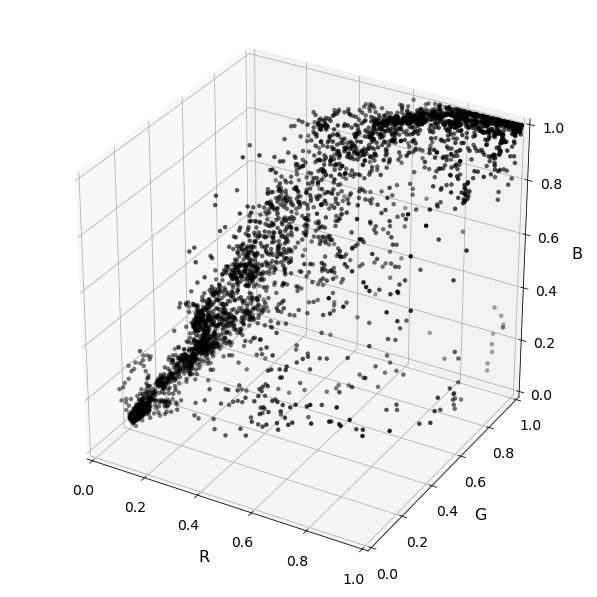

In [14]:
from util import plot3d

img = mpimg.imread('./examples/color_spaces2.png')
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
colors_rgb = img_small_RGB / 255.
plot3d(img, colors_rgb, axis_limits=[(0, 1), (0, 1), (0, 1)])

In [4]:
import os
from glob import glob

CARS_GLOB = './data/vehicles_smallset/*/*.jpeg'
NO_CARS_GLOB = './data/non-vehicles_smallset/*/*.jpeg'

cars_paths = glob(CARS_GLOB)
no_cars_paths = glob(NO_CARS_GLOB)

### Sliding Windows

(720, 1280, 3)


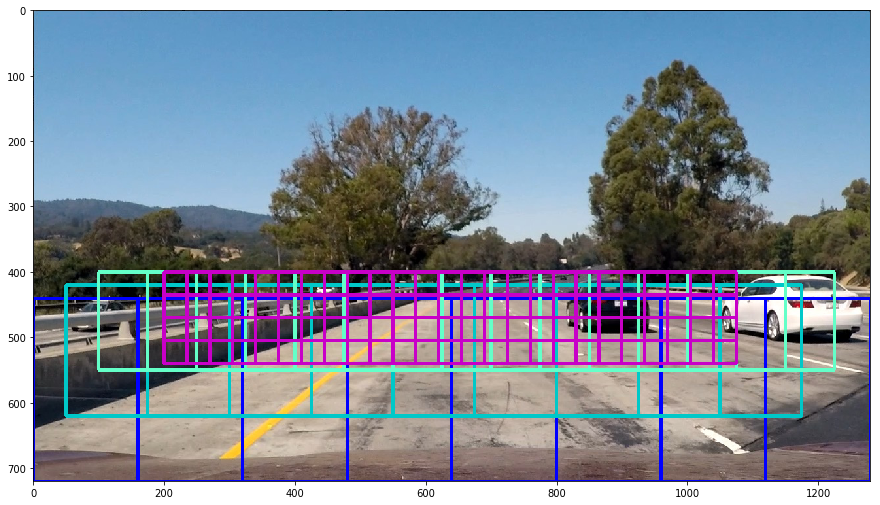

In [26]:
from sliding_window import sliding_window_gen
from itertools import chain
from util import draw_boxes
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


# image = mpimg.imread('./examples/bbox-example-image.jpg')
image = mpimg.imread('./test_images/test1.jpg')
fig = plt.figure(figsize=(15,10))
plt.imshow(image)

print(image.shape)

shape = image.shape

TOP = 400
BIGGER = (320, 280)
BIG = (250, 200)
MEDIUM = (150, 150)
SMALL = (70, 70)
TINY = (30, 30)

bigger_windows = sliding_window_gen(shape, 
                                 y_start=TOP+40,
                                 window_width=BIGGER[0], window_height=BIGGER[1], 
                                 y_overlap=.5, x_overlap=.5)

window_img = draw_boxes(image, bigger_windows, color=(0, 0, 255), thick=3)

big_windows = sliding_window_gen(shape, 
                              y_start=TOP+20, y_stop=TOP+220, 
                              x_start=50,
                              window_width=BIG[0], window_height=BIG[1], 
                              y_overlap=.5, x_overlap=.5)

window_img = draw_boxes(window_img, big_windows, color=(0, 200, 200), thick=3)


medium_windows = sliding_window_gen(shape, 
                              y_start=TOP, y_stop=TOP+200, 
                              window_width=MEDIUM[0], window_height=MEDIUM[1],
                              x_start = 100,
                              y_overlap=.5, x_overlap=.5)

window_img = draw_boxes(window_img, medium_windows, color=(100, 300, 200), thick=3)

small_windows = sliding_window_gen(shape, 
                             y_start=TOP, y_stop=TOP+140, 
                             x_start=200, x_stop=1100,
                             window_width=SMALL[0], window_height=SMALL[1], 
                             y_overlap=.5, x_overlap=.5)
window_img = draw_boxes(window_img, small_windows, color=(200, 0, 200), thick=3)


# tiny_windows = sliding_window_gen(shape, 
#                             y_start=TOP+10, y_stop=TOP+100, 
#                             x_start=400, x_stop=800,
#                             window_width=TINY[0], window_height=TINY[1], 
#                             y_overlap=.5, x_overlap=.5)

# window_img = draw_boxes(window_img, tiny_windows, color=(200, 200, 0), thick=2)

all_windows = chain(tiny_windows, small_windows, medium_windows, big_windows)
# window_img = draw_boxes(image, all_windows, color=(200, 200, 0), thick=3)

plt.imshow(window_img)

### Load Model

In [15]:
from sliding_window import search_windows
from train_classifier import load_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

stored = load_model()

### Init windows

In [11]:
from sliding_window import sliding_window_gen
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from itertools import chain
from util import draw_boxes

from itertools import chain
%matplotlib inline


# image = mpimg.imread('./examples/bbox-example-image.jpg')
image = mpimg.imread('./test_images/test1.jpg')
TOP = 360
HEIGHT = 64 #256 + 128
shape = image.shape
# window_sizes = [128, 192, 256]
window_sizes = [64, 96, 128]
OVERLAP = .6

all_windows = list(chain.from_iterable([sliding_window_gen(shape, 
                                        y_start=TOP, y_stop=TOP+HEIGHT+2*ws,
                                        x_start=200,
                                        window_width=ws, window_height=ws, 
                                        y_overlap=OVERLAP, x_overlap=OVERLAP) for ws in window_sizes]))

487


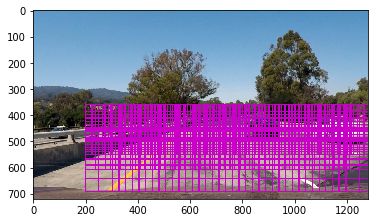

In [16]:
print(len(all_windows))
window_img = draw_boxes(image, all_windows, color=(200, 0, 200), thick=3)
plt.imshow(window_img)

### Find Cars

487
65


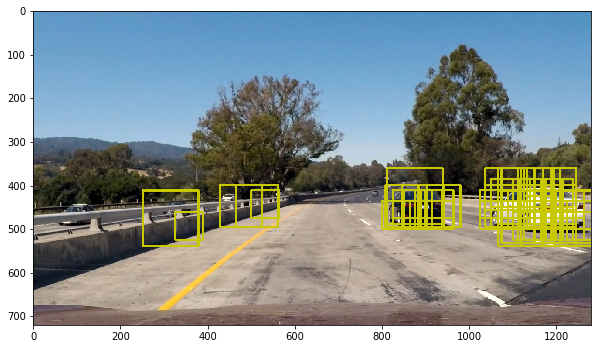

In [17]:
from util import draw_boxes
from sliding_window import search_windows

print(len(all_windows))
hot_windows = list(search_windows(image, all_windows, stored['model'], stored['scaler']))
print(len(hot_windows))
window_img = draw_boxes(image, hot_windows, color=(200, 200, 0), thick=3)
plt.figure(figsize={15,10})
plt.imshow(window_img)

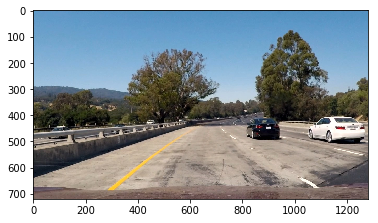

In [22]:
window_img = draw_boxes(image, all_windows, color=(200, 200, 0), thick=3)

plt.imshow(window_img)

In [24]:
list(all_windows)

[]

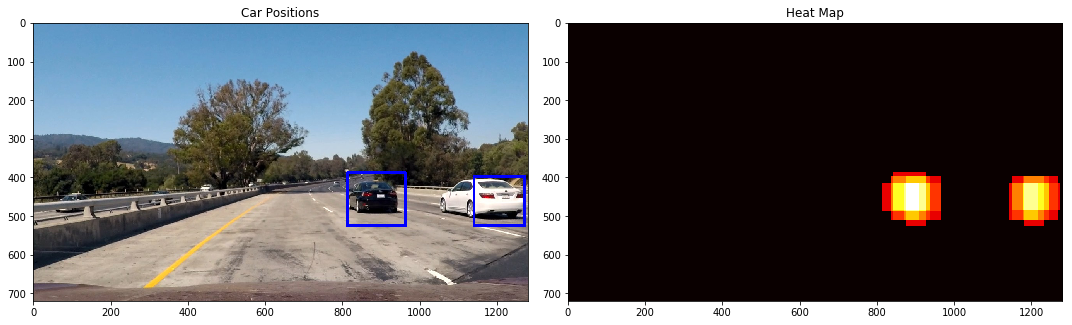

In [87]:
import numpy as np
from scipy.ndimage.measurements import label
import cv2

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list
heat = np.zeros_like(image[:,:,0]).astype(np.float)
heat = add_heat(heat,hot_windows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,2)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()